<a href="https://colab.research.google.com/github/kcalizadeh/phil_nlp/blob/master/data_load_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this cell mounts drive, sets the correct directory, then imports all functions
# and relevant libraries via the functions.py file
from google.colab import drive
import sys

# install relevent libraries not included with colab
!pip install lime
!pip install symspellpy

drive.mount('/gdrive',force_remount=True)

drive_path = '/gdrive/MyDrive/Colab_Projects/Phil_NLP'

sys.path.append(drive_path)

     |████████████████████████████████| 276kB 6.2MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=785d74a3e70caa06a18db43f744140c8790770c68b3c63802aff4538f63929b6
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 2.6MB 6.3MB/s 
Mounted at /gdrive


In [2]:
from functions import *
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

KeyboardInterrupt: ignored

With the functions loaded, we bring in the various texts.

In [3]:
# load the texts

## plato
plato_complete = get_text(drive_path + '/phil_txts/plato_complete_works.txt')

# aristotle
aristotle_vol1 = get_text(drive_path + '/phil_txts/aristotle_complete_works_v1.txt')
aristotle_vol2 = get_text(drive_path + '/phil_txts/aristotle_complete_works_v2.txt')

## rationalists
spinoza_ethics = get_guten('http://www.gutenberg.org/cache/epub/3800/pg3800.txt')
spinoza_improve_understanding = get_guten('http://www.gutenberg.org/cache/epub/1016/pg1016.txt')
leibniz_theodicy = get_guten('http://www.gutenberg.org/cache/epub/17147/pg17147.txt')
descartes_discourse_method = get_guten('http://www.gutenberg.org/cache/epub/59/pg59.txt')
descartes_meditations = get_text(drive_path + '/phil_txts/descartes_meditations.txt')
malebranche_search_truth = get_text(drive_path + '/phil_txts/malebranche_search_truth.txt')

## empiricists
locke_understanding_1 = get_guten('http://www.gutenberg.org/cache/epub/10615/pg10615.txt')
locke_understanding_2 = get_guten('http://www.gutenberg.org/cache/epub/10616/pg10616.txt')
locke_treatise_gov = get_guten('http://www.gutenberg.org/cache/epub/7370/pg7370.txt')
hume_treatise = get_guten('http://www.gutenberg.org/cache/epub/4705/pg4705.txt')
hume_natural_religion = get_guten('http://www.gutenberg.org/cache/epub/4583/pg4583.txt')
berkeley_treatise = get_guten('http://www.gutenberg.org/cache/epub/4723/pg4723.txt')
berkeley_three_dialogues = get_guten('http://www.gutenberg.org/cache/epub/4724/pg4724.txt')

## german idealism
kant_practical_reason = get_text(drive_path + '/phil_txts/kant_critique_practical_reason.txt')
kant_judgement = get_text(drive_path + '/phil_txts/kant_critique_judgement.txt')
kant_pure_reason = get_text(drive_path + '/phil_txts/kant_pure_reason.txt')
fichte_ethics = get_text(drive_path + '/phil_txts/fichte_system_of_ethics.txt')
hegel_logic = get_text(drive_path + '/phil_txts/hegel_science_of_logic.txt')
hegel_phenomenology = get_text(drive_path + '/phil_txts/hegel_phenomenology_of_spirit.txt')
hegel_right = get_text(drive_path + '/phil_txts/hegel_elements_of_right.txt')

## analytic
russell_problems_of_phil = get_guten('http://www.gutenberg.org/cache/epub/5827/pg5827.txt')
russell_analylsis_of_mind = get_guten('http://www.gutenberg.org/cache/epub/2529/pg2529.txt')
moore_studies = get_guten('http://www.gutenberg.org/files/50141/50141-0.txt')
wittgenstein_tractatus = get_text(drive_path + '/phil_txts/wittgenstein_tractatus.txt')
wittgenstein_investigations = get_text(drive_path + '/phil_txts/wittgenstien_philosophical_investigations.txt')
lewis_papers1 = get_text(drive_path + '/phil_txts/lewis_papers_1.txt')
lewis_papers2 = get_text(drive_path + '/phil_txts/lewis_papers_2.txt')
quine_quintessence = get_text(drive_path + '/phil_txts/quine_quintessence.txt')
popper_science = get_text(drive_path + '/phil_txts/popper_logic_of_science.txt')
kripke_troubles = get_text(drive_path + '/phil_txts/kripke_philosophical_troubles.txt')
kripke_naming = get_text(drive_path + '/phil_txts/kripke_naming_necessity.txt')

## phenomenology
ponty_perception = get_text(drive_path + '/phil_txts/merleau-ponty_phenomenology_of_perception.txt')
husserl_idea_of = get_text(drive_path + '/phil_txts/husserl_idea_of_phenomenology.txt')
husserl_crisis = get_text(drive_path + '/phil_txts/husserl_crisis_of_euro_sciences.txt')
husserl_cartesian = get_text(drive_path + '/phil_txts/husserl_cartesian_meditations.txt')
heidegger_being_time = get_text(drive_path + '/phil_txts/heidegger_being_and_time.txt')
heidegger_track = get_text(drive_path + '/phil_txts/heidegger_off_the_beaten_track.txt')

## continental
foucault_order = get_text(drive_path + '/phil_txts/foucault_order_of_things.txt')
foucault_madness = get_text(drive_path + '/phil_txts/foucault_history_of_madness.txt')
foucault_clinic = get_text(drive_path + '/phil_txts/foucault_birth_of_clinic.txt')
derrida_writing = get_text(drive_path + '/phil_txts/derrida_writing_difference.txt')
deleuze_oedipus = get_text(drive_path + '/phil_txts/deleuze_guattari_anti-oedipus.txt')
deleuze_difference = get_text(drive_path + '/phil_txts/deleuze_difference_repetition.txt')

## marxism
marx_kapital = get_text(drive_path + '/phil_txts/marx_kapital.txt')
marx_manifesto = get_text(drive_path + '/phil_txts/marx_manifesto.txt')
lenin_essential = get_text(drive_path + '/phil_txts/lenin_essential_works.txt')

## capitalist economics
smith_wealth = get_guten('http://www.gutenberg.org/files/3300/3300-0.txt')
ricardo_political_economy = get_guten('http://www.gutenberg.org/cache/epub/33310/pg33310.txt')
keynes_employment = get_text(drive_path + '/phil_txts/keynes_theory_of_employment.txt')


Now we cut out front and end-matter. This needs to be done ad hoc, since there is no consistent marker for it.

In [4]:
plato_complete = plato_complete.split('find that an enticing')[1][388:].split('Demeter, whose cult at')[0]

aristotle_vol_1 = aristotle_vol1.split('1a20-1b9')[1].split('799a16')[0]
aristotle_vol_2 = aristotle_vol2.split('830a5-830b4')[1].split('1462a5-1462a13')[0]

spinoza_ethics = spinoza_ethics.split('ranslated from the Latin by R.')[1][71:].split('End of the Ethics')[0]
spinoza_improve_understanding = spinoza_improve_understanding.split('Farewell.*')[1][20:].split('End of ')[0]
leibniz_theodicy = leibniz_theodicy.split('appeared in 1710 as the')[1][202:].split('SUMMARY OF THE CON')[0][:-140]
descartes_discourse_method = descartes_discourse_method.split('PREFATORY NOTE')[1][18:].split('End of the Pr')[0]
descartes_meditations = descartes_meditations.split('LETTER')[1][1:].split('EXPLANATORY NOTES')[0][:-8]
malebranche_search_truth = malebranche_search_truth.split("n's Mind and the Use H")[1][64:].split('Beati qui')[0]

locke_understanding_1 = locke_understanding_1.split('2 Dorset Court, 24th of May, 1689')[1][50:].split('End of the Pro')[0][:-30]
locke_understanding_2 = locke_understanding_2.split('1. Man fitted to form articulated Sounds.')[1][4:].split('End of the Pro')[0][:-25]
locke_treatise_gov = locke_treatise_gov.split('now lodged in Christ College, Cambridge.')[1][21:].split('FINIS.')[0]
hume_treatise = hume_treatise.split('ADVERTISEMENT')[1][9:].split('End of Pro')[0][:-14]
hume_natural_religion = hume_natural_religion.split('PAMPHILUS TO HERMIPPUS')[1][6:].split('End of the Pro')[0][:-22]
berkeley_treatise = berkeley_treatise.split('are too apt to condemn an opinion before they rightly')[1][47:].split('End of the Pr')[0][:-22]
berkeley_three_dialogues = berkeley_three_dialogues.split('THE FIRST DIALOGUE')[1][17:].split('End of the Pro')[0][:-22]

kant_practical_reason = kant_practical_reason.split('erner Pluhar an')[1][329:].split('stone of the wi')[0][:-20]
kant_judgement = kant_judgement.split('TO THE FIRST EDITION,* 1790')[1][1:].split('EXPLANATORY NOTES')[0][:-39]
kant_pure_reason = kant_pure_reason.split('Bacon of Verulam')[1][33:].split('(Persius, Satires, iii, 78-9).')[0][:-1]
fichte_ethics = fichte_ethics.split('(“Krause Nachschrift,” 1798/99)')[1][111:].split('Page 345')[0][:-2]
hegel_logic = hegel_logic.split('complete transformati')[1][249:].split('It is a matter of speculation how Hegel would have rev')[0][:-80]
hegel_phenomenology = hegel_phenomenology.split('PREFACE: ON SCIENTIFIC')[1][1:].split('1I Adaptation')[0][:-62]
hegel_right = hegel_right.split('he immediate occasion f')[1][184:].split('I Hegel lectured on the topics in')[0][:-28]

russell_problems_of_phil = russell_problems_of_phil.split('n the following pages')[1].split('BIBLIOGRAPHICAL NOTE')[0]
russell_analylsis_of_mind = russell_analylsis_of_mind.split('H. D. Lewis')[2][21:].split('End of Pro')[0]
moore_studies = moore_studies.split('Aristotelian Society,_ 1919-20.')[1][23:].split('E Wes')[0][:-10]
wittgenstein_tractatus = wittgenstein_tractatus.split('TRACTATUS LOGICO-PHILOSOPHICUS')[1][70:].split('I NDEX')[0][:-8]
wittgenstein_investigations = wittgenstein_investigations.split('catty')[1][787:].split("above', 351")[0]
lewis_papers1 = lewis_papers1.split('The fifteen papers')[1][61:].split('Acquai')[0][:-10]
lewis_papers2 = lewis_papers2.split('Part Four Counterfactuals and Time')[1][17:].split('end p.342')[0]
quine_quintessence = quine_quintessence.split('T R UT H B Y C O N V E N T I O N')[1].split('CREDITS')[0][:-7]
popper_science = popper_science.split('F IRST E NGLISH E DITION, 1959')[1][2:].split('This is the end of the text of the original book.')[0]
kripke_troubles = kripke_troubles.split('apters 2, 3, 7, 10, 11, and 13 are previously unpublish')[1][103:].split('ans, Gareth. 198')[0][:-25]
kripke_naming = kripke_naming.split('xjvdsa')[1][10:].split('hese addenda represe')[0][:-35]

ponty_perception = ponty_perception.split('P REFACE')[1].split('B IBLIOGRAPHY')[0][:-65]
husserl_idea_of = husserl_idea_of.split('LECTUREl')[1][9:].split('Abstraction, ideating, 47, 50, 65')[0][:-10]
husserl_crisis = husserl_crisis.split('§ 1.')[1].split('Appendix X:')[0]
husserl_cartesian = husserl_cartesian.split('of philosophical reflection.')[1].split('n. 72.')[0][:-5]
heidegger_being_time = heidegger_being_time.split("AUTHOR'S PREFACE TO THE")[1][25:].split('Not "the" sole way.')[0][:-8]
heidegger_track = heidegger_track.split('translated in several ')[1][15:].split('et-up [dar Gestellj as the uunost obli')[0][:-32]

foucault_order = foucault_order.split('P REFACE')[1]
foucault_madness = foucault_madness.split('ickering simulacra, an')[1][112:].split('Page 591')[0]
foucault_clinic = foucault_clinic.split('iagnostic (Paris, 1962, p.')[1][15:].split('de Sade.')[0][:-33]
derrida_writing = derrida_writing.split('(Flaubert, Preface d la d')[1][10:].split('Reb Derissa')[0]
deleuze_oedipus = deleuze_oedipus.split('xjdsde')[1].split('jajielaks')[0]
deleuze_difference = deleuze_difference.split('Introduction:')[1].split('Plateaus')[0][:-65]

marx_kapital = ((marx_kapital.split('E MAGNITUDE OF VALUE)')[1].split('expropriation of the laborer.')[0])+'expropriation of the laborer.')
marx_manifesto = marx_manifesto.split('page 29')[1].split('Mao')[0][:-15]
lenin_essential = lenin_essential.split('We will now sum up the theoretical')[1].split('SUGGESTIONS FOR FURTHER READING')[0]

smith_wealth = smith_wealth.split('INTRODUCTION AND PLAN OF THE WORK.')[2].split('End of the Project Gutenberg EBook of An Inquiry into the Nat')[0]
ricardo_political_economy = ricardo_political_economy.split('ON VALUE.')[1].split('  FOOTNOTES:')[0]
keynes_employment = keynes_employment.split('GENERAL INTRODUCTION')[1].split('PRINTING ERRORS IN THE FIRST EDITION CORRECTE')[0][:-145]


Having isolated the relevant portions of each document, we can now unify all the texts in each school.

In [5]:
# a list of books for each school, then aggregated and entered into a dictionary
plato_texts = [plato_complete]
aristotle_texts = [aristotle_vol1, aristotle_vol2]
rationalist_texts = [spinoza_ethics, spinoza_improve_understanding, 
                    leibniz_theodicy, descartes_discourse_method, 
                     descartes_meditations, malebranche_search_truth]
empiricist_texts = [locke_treatise_gov, locke_understanding_1, locke_understanding_2, 
                    hume_treatise, hume_natural_religion, berkeley_three_dialogues, 
                    berkeley_treatise]
german_idealist_texts = [kant_practical_reason, kant_judgement, kant_pure_reason, 
                         fichte_ethics, hegel_logic, hegel_phenomenology, hegel_right]
analytic_texts = [russell_analylsis_of_mind, russell_problems_of_phil, 
                  moore_studies, wittgenstein_investigations, wittgenstein_tractatus, 
                  lewis_papers1, lewis_papers2, quine_quintessence, popper_science, 
                  kripke_naming, kripke_troubles]
phenomenology_texts = [ponty_perception, husserl_cartesian, husserl_crisis, 
                       husserl_idea_of, heidegger_being_time, heidegger_track]
continental_texts = [foucault_clinic, foucault_madness, foucault_order, 
                     derrida_writing, deleuze_difference, deleuze_oedipus]
marxist_texts = [marx_kapital, marx_manifesto, lenin_essential]
capitalist_texts = [smith_wealth, ricardo_political_economy, keynes_employment]

all_texts = plato_texts + aristotle_texts + empiricist_texts + rationalist_texts + analytic_texts + continental_texts + phenomenology_texts + german_idealist_texts + marxist_texts + capitalist_texts
all_texts_string = ' . '.join(all_texts)

text_dict_list = {'plato': plato_texts, 'aristotle': aristotle_texts, 
             'empiricism': empiricist_texts, 'rationalism': rationalist_texts, 
            'german_idealism': german_idealist_texts, 
             'phenomenology': phenomenology_texts, 'analytic': analytic_texts, 
            'continental': continental_texts, 'marxism': marxist_texts,
             'capitalism': capitalist_texts}

text_dict = {}
for school in text_dict_list.keys():
    text_dict[school] = ' . '.join(text_dict_list[school])

For a bit of preliminary EDA, we can make word clouds for each school. Here we prepare the text for this with some very basic cleaning to remove encoding artifacts and the like. Then we build the word clouds and present them.

In [ ]:
# some basic initial cleaning
all_texts_string = all_texts_string.replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')

for school in text_dict.keys():
    text_dict[school] = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', text_dict[school])
    text_dict[school] = re.sub(r'[0123456789]', ' ', text_dict[school])
    text_dict[school] = text_dict[school].replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')

In [ ]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might', "'s", 'b', 'ofthe', 'p.', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil', 'one', 'press', 'cent', 'place'] + stopwords_list

In [ ]:
cloud_dict = {}
for school in text_dict.keys():
    cloud_dict[school] = make_word_cloud(text_dict[school], custom_stopwords)
    cloud_dict['middle1'] = make_word_cloud('this page intentionally left blank', stopwords=[])
    cloud_dict['middle2'] = make_word_cloud('this page intentionally left blank', stopwords=[])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


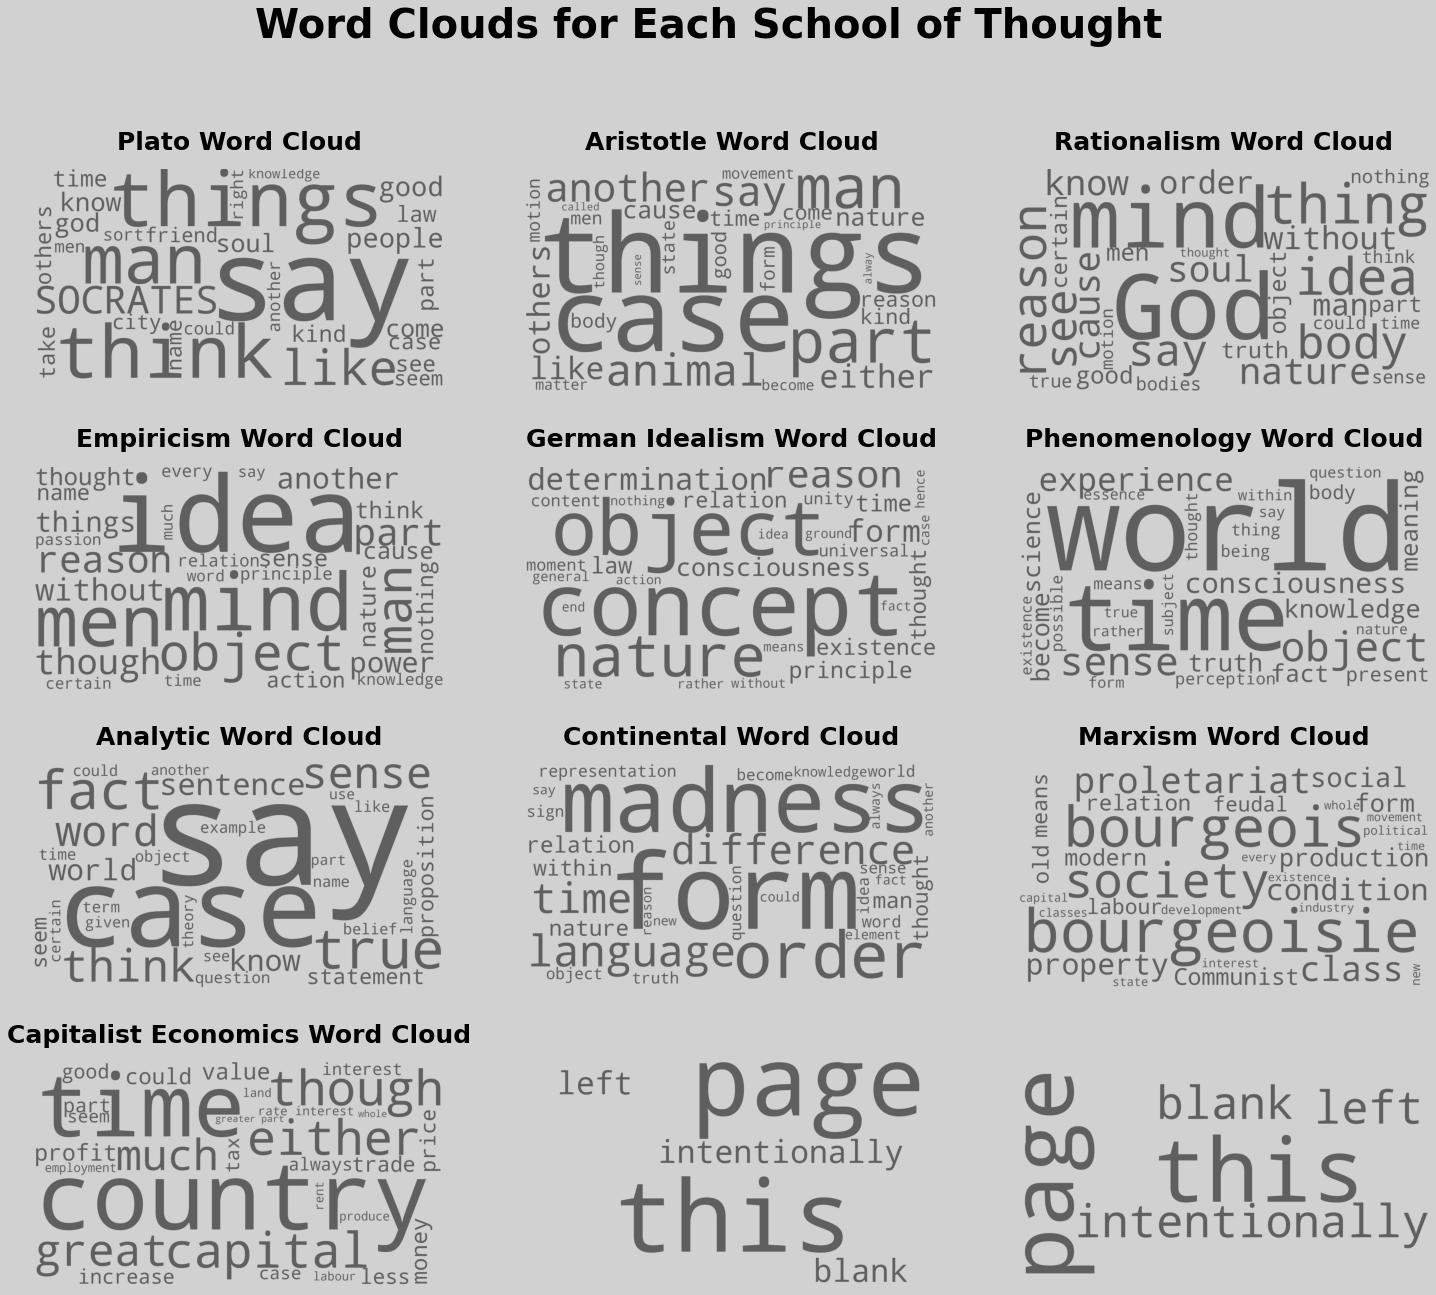

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(25, 21))
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for Each School of Thought', size=40, fontweight='bold')
ax1.imshow(cloud_dict['plato'])
ax1.set_title('Plato Word Cloud', size=25, pad=20, fontweight='bold')
ax2.imshow(cloud_dict['aristotle'])
ax2.set_title('Aristotle Word Cloud', size=25, pad=20, fontweight='bold')
ax3.imshow(cloud_dict['rationalism'])
ax3.set_title('Rationalism Word Cloud', size=25, pad=20, fontweight='bold')
ax4.imshow(cloud_dict['empiricism'])
ax4.set_title('Empiricism Word Cloud', size=25, pad=20, fontweight='bold')
ax5.imshow(cloud_dict['german_idealism'])
ax5.set_title('German Idealism Word Cloud', size=25, pad=20, fontweight='bold')
ax6.imshow(cloud_dict['phenomenology'])
ax6.set_title('Phenomenology Word Cloud', size=25, pad=20, fontweight='bold')
ax7.imshow(cloud_dict['analytic'])
ax7.set_title('Analytic Word Cloud', size=25, pad=20, fontweight='bold')
ax8.imshow(cloud_dict['continental'])
ax8.set_title('Continental Word Cloud', size=25, pad=20, fontweight='bold')
ax9.set_title('Marxism Word Cloud', size=25, pad=20, fontweight='bold')
ax9.imshow(cloud_dict['marxism'])
ax10.set_title('Capitalist Economics Word Cloud', size=25, pad=20, fontweight='bold')
ax10.imshow(cloud_dict['capitalism'])
ax11.imshow(cloud_dict['middle1'])
ax12.imshow(cloud_dict['middle2'])
for ax in fig.axes:
    ax.axis('off')
fig.patch.set_facecolor('#D1D1D1')
plt.show()

Note that these word clouds are the result of applying many custom stopwords. Those words were words that had significant overlap between schools and so could not be used to distinguish them.

One of these common stopwards was the word 'one.' I guess Plato was right about it being the central concept of philosophy. 

Even after this pruning, a lot of the same words show up in all the schools. But there are also a good number of differences between the schools as well, enough that a model is not *prima facie* a lost cause.

Our next step is to explore the frequency distrubtion of words in the corpus, both in the texts as a whole and in the individual schools.

In [ ]:
all_texts_string = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', all_texts_string)
all_texts_string = re.sub(r'[0123456789]', ' ', all_texts_string)

In [ ]:
nltk.download('punkt')
all_text_words = word_tokenize(all_texts_string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cleaned_words = [x.lower() for x in all_text_words if x.lower() not in custom_stopwords]
freq_dist = FreqDist(cleaned_words)

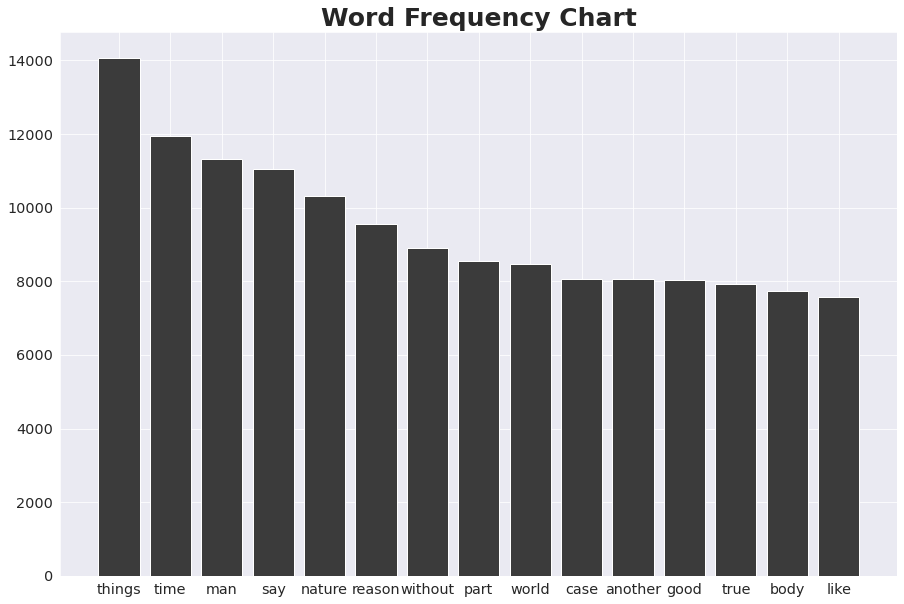

In [ ]:
sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
plt.bar(x=[x[0] for x in freq_dist.most_common(15)], height=[x[1] for x in freq_dist.most_common(15)], color='#3B3B3B')
plt.title('Word Frequency Chart', size=25, fontweight='bold')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

This more or less matches all the major topics of philosophy - ontology ('things'), human nature ('man'), logic and rationality ('reason'), truth ('true'), language ('say'). Of course these also reflect common turns of phrase in philosophical texts; these texts often discuss what is true and what others say, for example.

Now let's take a look at frequency distributions for each school.

In [ ]:
uninformative_words = ['else', 'shall', 'either', 'still', 'rather', 'another', 'made', 'without']
school_stopwords = custom_stopwords + [x[0] for x in freq_dist.most_common(50)] + uninformative_words

In [ ]:
freq_dist_dict = {}
for school in text_dict.keys():
    school_words = word_tokenize(text_dict[school])
    cleaned_words_school = [x.lower() for x in school_words if x.lower() not in school_stopwords]
    school_freq_dict = FreqDist(cleaned_words_school)
    freq_dist_dict[school] = school_freq_dict.most_common(15)

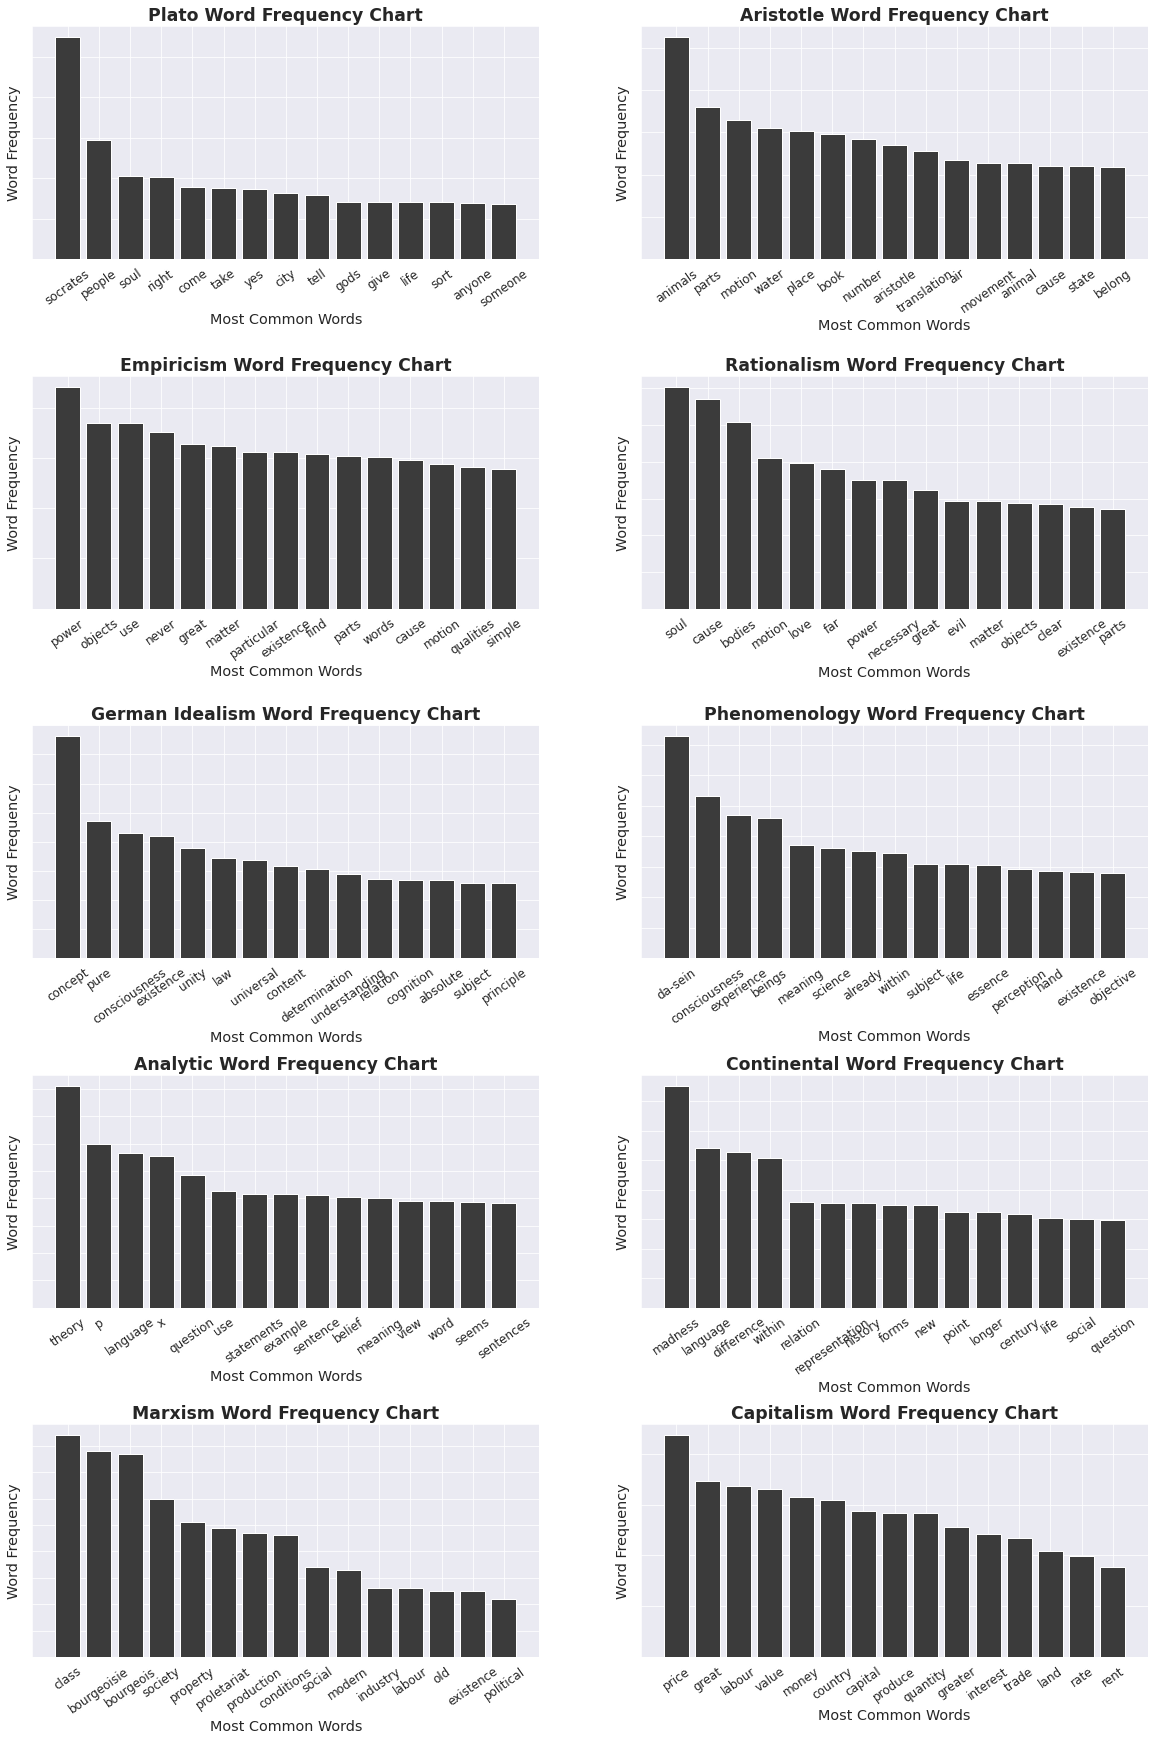

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(freq_dist_dict.keys(), axs.flatten()):
    ax.bar(x=[x[0] for x in freq_dist_dict[school]], height=[x[1] for x in freq_dist_dict[school]], color='#3B3B3B')
    xlabels = [x[0] for x in freq_dist_dict[school]]
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Words', size='x-large')
    ax.set_ylabel('Word Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Word Frequency Chart', size='xx-large', fontweight='bold')
plt.show()

A lot of this is unsurprising - no one should be baffled that the word 'socrates' turns up a lot in Plato. Others are perhaps more interesting - the appearance of 'animal' in Aristotle, for example. And yet others are just artifacts of the texts we had available - the word 'madness' is common in Continental philosophy because of Foucault's book *History of Madness*. That said, some of these are comical as well. For example, analytic philosophy's tendency to logical formalism led to it having variables for propositions ('p' and 'x') among its most commonly used words.

Still, these each seem substantially different enough that we should be able to build a reasonable model. Although we could leap to building a model right now, let's do a little more exploring by examining the bigrams.

In [ ]:
# tokenizing the text to prepare it
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
all_tokens = nltk.regexp_tokenize(all_texts_string, pattern)

all_tokens_stopped = [x.lower() for x in all_tokens if x.lower() not in custom_stopwords]

In [ ]:
# from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()
all_bigram_finder = BigramCollocationFinder.from_words(all_tokens_stopped)
bigrams_scored = all_bigram_finder.score_ngrams(bigram_measures.raw_freq)

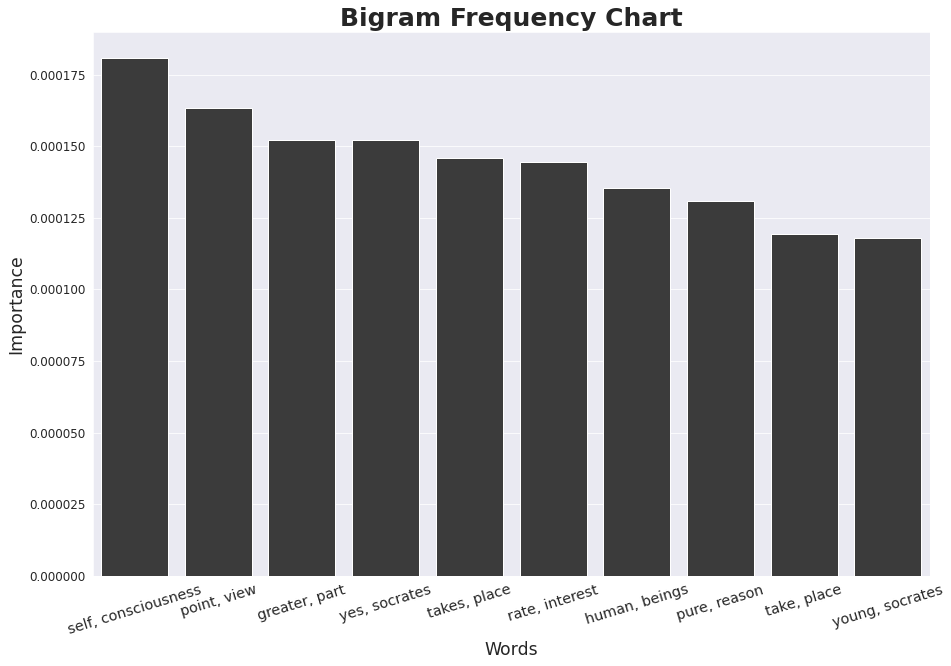

In [ ]:
bigram_df = pd.DataFrame(bigrams_scored[:10], columns=['bigram', 'score'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ', '.join(x))

sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
sns.barplot(data=bigram_df, x='bigram', y='score', color='#3B3B3B')
plt.title('Bigram Frequency Chart', size=25, fontweight='bold')
plt.xlabel('Words', size='xx-large')
plt.xticks(rotation=17, size='x-large')
plt.ylabel('Importance', size='xx-large')
plt.yticks(size='large')
plt.show()

While this isn't particularly informative, it does show us some common phrases used throughout the history of philosophy.

Next we can create similar charts for each school to see which schools use which phrases preferentially.*italicized text*

In [ ]:
# custom stopwords for each school since there are odd phrases in each
plato_stopwords = ['socrates', 'theaetetus', 'alcibiades', 'yes', 'clinias']
aristotle_stopwords = ['princeton', 'translation', 'ii', 'book', 'oxford', 'works', 'aristotle']
empiricism_stopwords = []
rationalism_stopwords = ['nicolas', 'replies', 'search', 'q', 'prop']
german_idealism_stopwords = ['elements', 'wilhelm', 'friedrich', 'georg', 'press',
                             'ii', 'ak', 'pt', 'div', 'bk']
phenomenology_stopwords = ['perception', 'signi']
analytic_stopwords = ['investigations', 'naming', 'x', 'nite', 'de']
continental_stopwords = ['seventeenth', 'eighteenth', 'nineteenth', 'classical', 
                          'things', 'anti', 'difference', 'organs', 'ibid', 'de',
                         'di']
marxism_stopwords = ['note', 'page']
capitalism_stopwords = []

stopwords_dict = {'plato': plato_stopwords, 'aristotle': aristotle_stopwords, 
                  'rationalism': rationalism_stopwords, 'empiricism': empiricism_stopwords, 
                  'german_idealism': german_idealism_stopwords, 'analytic': analytic_stopwords, 
                  'continental': continental_stopwords, 'phenomenology': phenomenology_stopwords, 
                  'marxism': marxism_stopwords, 'capitalism': capitalism_stopwords}

# building the bigrams for each school
bigram_dict = {}
for school in text_dict.keys():
    tokens = nltk.regexp_tokenize(text_dict[school], pattern)
    tokens_stopped = [x.lower() for x in tokens if x.lower() not in (custom_stopwords + stopwords_dict[school])]
    measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens_stopped)
    scored = finder.score_ngrams(measures.raw_freq)
    bigram_dict[school] = scored


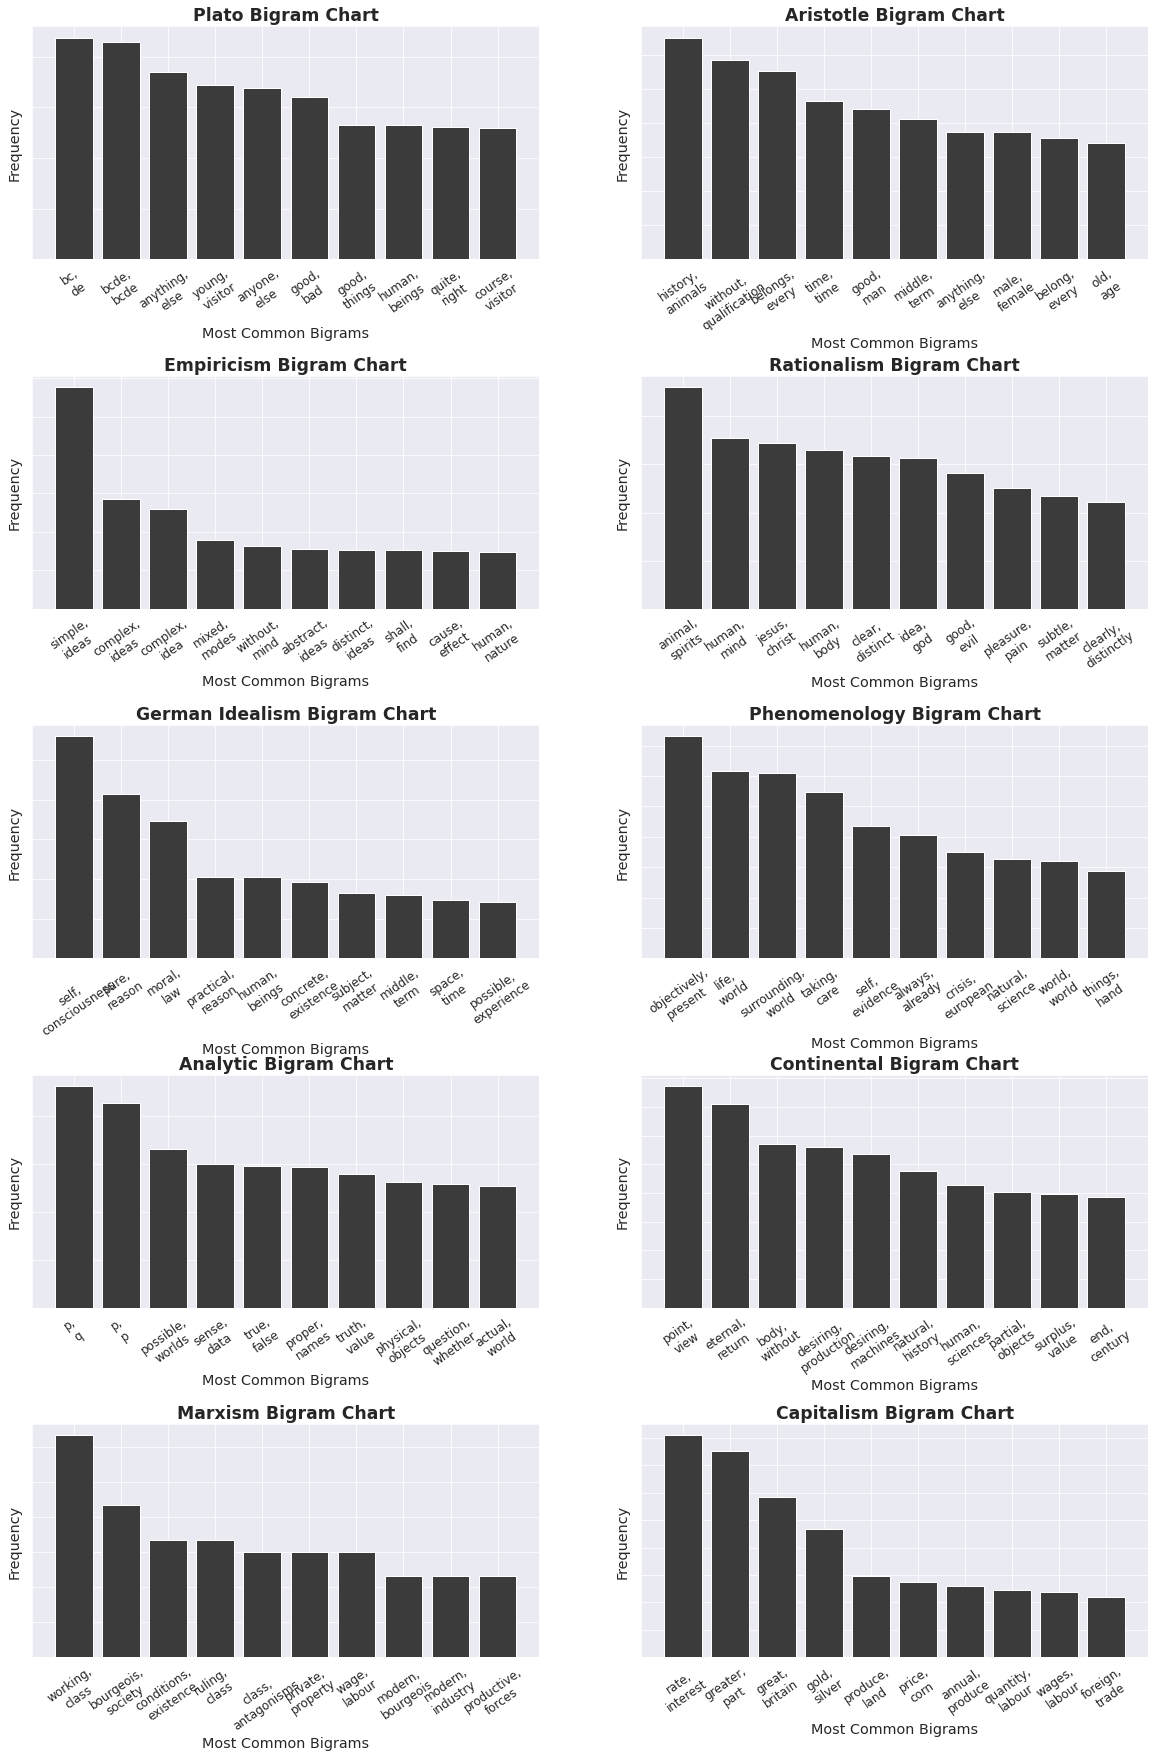

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(bigram_dict.keys(), axs.flatten()):
    labels = [',\n'.join(x[0]) for x in bigram_dict[school][:10]]
    heights = [x[1] for x in bigram_dict[school][:10]]
    ax.bar(x=labels, height=heights, color='#3B3B3B')
    xlabels = labels
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Bigrams', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Bigram Chart', size='xx-large', fontweight='bold')
plt.show()

Not bad! These bigrams actually give a solid sense of the key concepts of some of the schools. Rationalism's emphasis on 'clear and distinct ideas' and empiricism's focus on 'simple and complex ideas' are so forceful that both singular and plural versions of the phrases show up. Heidegger's common phrase 'always already' finds itself on the Phenomenology bigram list, and the German Idealist's continual discussion of self-consciousness is also evident. Aristotle and Plato's bigrams are harder to interpret, with Plato's being mostly common locutions from the dialogues rather than anything philosophically significant.

#### More In-Depth Cleaning

All the previous explorations were done with some basic cleaning methods like removing stopwords, we also encountered a lot of strange features of the texts that so far we have just brushed over. 


In [ ]:
remove 

*cleaning* steps
- look at the word frequencies and bigrams for each one *without stopwords* and note the oddities, (also look at the txt file to see if there are any repetitive strangenesses)
- use the symspacer to try and deal with the fused words
- for some, you can just remove the words from the text altogether (this if the oddity is inserted into the middle of a sentence like page number or div notes)
- for most though, you'll need to sent-tokenize the text, and develop some way of finding all and only sentences with the offending features and remove them (this for headers)

In [26]:
plato_texts[0][30000:35000]

'ES: Nor do I think that this is what you mean—far from it—but\nthat is why I asked you what you meant by the care of gods, because I\ndid not believe you meant this kind of care.\nEUTHYPHRO: Quite right, Socrates, that is not the kind of care I mean.\nSOCRATES: Very well, but what kind of care of the gods would piety be?\nEUTHYPHRO: The kind of care, Socrates, that slaves take of their masters.\nSOCRATES: I understand. It is likely to be a kind of service of the gods.\nEUTHYPHRO: Quite so.\nSOCRATES: Could you tell me to the achievement of what goal service to\ndoctors tends? Is it not, do you think, to achieving health?\nEUTHYPHRO: I think so.\nSOCRATES: What about service to shipbuilders? To what achievement is\nit directed?\nEUTHYPHRO: Clearly, Socrates, to the building of a ship.\nSOCRATES: And service to housebuilders to the building of a house?\nEUTHYPHRO: Yes.\nSOCRATES: Tell me then, my good sir, to the achievement of what aim\ndoes service to the gods tend? You obviously know

In [9]:
plato_corrected = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â:‘’]', '', plato_complete)
plato_corrected = re.sub(r'[\n\r]', ' ', plato_corrected)
plato_corrected = re.sub(r'[A-Z]{2,}', '', plato_corrected)

In [27]:
plato_corrected[200000:209000]

'lieve myself to be a fellow servant with the swans and dedicated to the same god, and have received from my master a gift of prophecy not inferior to theirs, I am no more despondent than they on leaving life. Therefore, you must speak and ask whatever you want as long as the authorities allow it.” Well spoken, said Simmias. I will tell you my difficulty, and then Cebes will say why he does not accept what was said. I believe, as perhaps you do, that precise knowledge on that subject is impossible or extremely difficult in our present life, but that it surely shows a very poor spirit not to examine thoroughly what is said about it, and to desist before one is exhausted by an all-round investigation. One should achieve one of these things learn the truth about these things or find it for oneself, or, if that is impossible, adopt the best and most irrefutable of men’s theories, and, borne upon this, sail through the dangers of life as upon a raft, unless someone should make that journey 

In [111]:
to_correct = """YOUNG SOCRATES: Of 327e. II.\n III. IVThe Visitor will immedi VI. IX. XI XX. –
course. 44. The Greek d e f \nf- 3 \n192 d f l \nf\nr\nz\nk d r  here LIVEE IVY
v. ii iv. is obscure. II.\n III. IVThe Visitor will immediately explain—in d11–e1—the first of the two ‘parts’ of the expertise of measurement; the second emerges graduallyat 284a5–b2, e2–8. See also 284c1 and d6, ’the coming into being of what is in dueeasure’, and the reference at 285a1–2 to ‘an art of measurement relating to everythingthat comes into being’. 45. Reading hoi agathoi at e6. Statesman 327"""
to_correct

'YOUNG SOCRATES: Of 327e. II.\n III. IVThe Visitor will immedi VI. IX. XI XX. –\ncourse. 44. The Greek d e f \nf- 3 \n192 d f l \nf\nr\nz\nk d r  here LIVEE IVY\nv. ii iv. is obscure. II.\n III. IVThe Visitor will immediately explain—in d11–e1—the first of the two ‘parts’ of the expertise of measurement; the second emerges graduallyat 284a5–b2, e2–8. See also 284c1 and d6, ’the coming into being of what is in dueeasure’, and the reference at 285a1–2 to ‘an art of measurement relating to everythingthat comes into being’. 45. Reading hoi agathoi at e6. \nStatesman 327'

In [121]:
def baseline_clean(to_correct):
  # remove utf8 encoding characters and some odd punctuations
  result = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â:‘’“”]', '', to_correct)
  result = re.sub(r'[\u2014\u2013\u2012-]', ' ', result)

  # replace whitespace characters with actual whitespace
  result = re.sub(r'\s', ' ', result)

  # remove roman numerals, first capitalized ones
  result = re.sub(r'\s((I{2,}V*X*\.*)|(IV\.*)|(IX\.*)|(V+[I*]\.*)|(X+[I*V*X*]\.*))', ' ', result)
  # then lowercase
  result = re.sub(r'\s((i{2,}v*x*\.*)|(iv\.*)|(ix\.*)|(v+[i*]\.*)|(x+[i*v*x*]\.*))', ' ', result)

  # remove the number-letter-number pattern used for many citations
  result = re.sub(r'\d*\w{,2}\d', ' ', result)

  # remove numerical characters (and accompanying periods for footnotes)
  result = re.sub(r'\d+', ' ', result)

  # remove words of 2+ characters that are entirely capitalized 
  # (these are almost always titles, headings, or speakers in a dialogue)
  result = re.sub(r'[A-Z]{2,}', '', result)

  # remove isolated letters (do it several times because strings of isolated letters do not get captured properly)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)

  # remove isolated letters at the end of sentences or before commas
  result = re.sub(r'\s[^aI]\.', '.', result)
  result = re.sub(r'\s[^aI],', ',', result)

  # reduce multiple periods into a single one
  result = re.sub(r'\.+', '.', result)

  return result


baseline_clean(to_correct)

'  Of .  The Visitor will immedi course. The Greek  here . is obscure.  The Visitor will immediately explain in the first of the two parts of the expertise of measurement; the second emerges graduallyat . See also and, the coming into being of what is in dueeasure, and the reference at to an art of measurement relating to everythingthat comes into being. Reading hoi agathoi at.  Statesman  '

In [63]:
# 
-p[=]

In [32]:
len(tokenized_text_dict['plato'])

1

In [24]:
for school in tokenized_text_dict.keys():
  tokenized_text_dict[school] = []
  for book in tokenized_text_dict[school]:
    for sentence in book:
      tokenized_text_dict[school].append(sentence)

In [ ]:
# some basic initial cleaning
all_texts_string = all_texts_string.replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')

for school in text_dict.keys():
    text_dict[school] = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', text_dict[school])
    text_dict[school] = re.sub(r'[0123456789]', ' ', text_dict[school])
    text_dict[school] = text_dict[school].replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')

In [41]:
desc = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', descartes_meditations)
desc = re.sub(r'[0123456789]', ' ', desc)
desc = nlp(descartes_meditations)

str

In [64]:
nlp.max_length = 9000000
tokenized_text_dict = {}
for school in text_dict_list.keys():
  tokenized_text_dict[school] = []

In [70]:
for school in tokenized_text_dict.keys():
  tokenized_text_dict[school] = [sent for sublist in tokenized_text_dict[school] for sent in sublist]



In [71]:
for school in tokenized_text_dict.keys():
  print(len(tokenized_text_dict[school]))

0
0
0
32815
0
0
0
0
0
0


In [67]:
# for school in text_dict_list.keys():
for book in text_dict_list['rationalism']:
  book = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', book)
  book = re.sub(r'[0123456789]', ' ', book)
  book_nlp = nlp(book, disable=['ner'])
  tokenized_text_dict['rationalism'].append(list(book_nlp.sents))
  # print(school + ' completed')




In [69]:
tokenized_text_dict['rationalism'][0][:10]

[By that which is self--caused, I mean that of which theessence involves existence, or that of which the nature is onlyconceivable as existent.,
 II.  ,
 A thing is called finite after its kind, when it can belimited by another thing of the same nature; for instance, abody is called finite because we always conceive another greaterbody.  ,
 So, also, a thought is limited by another thought, but abody is not limited by thought, nor a thought by body.,
 III.  ,
 By substance, I mean that which is in itself, and isconceived through itself: in other words, that of which aconception can be formed independently of any other conception.,
 IV.  ,
 By attribute, I mean that which the intellect perceives asconstituting the essence of substance.,
 V.  ,
 By mode, I mean the modifications  of substance, or thatwhich exists in, and is conceived through,]

In [73]:
text_df = pd.DataFrame(columns=['school', 'sentences'])
for school in tokenized_text_dict.keys():
    school_df = pd.DataFrame(columns=['school', 'sentences'])
    school_df['sentences'] = tokenized_text_dict[school]
    school_df['school'] = school
    text_df = text_df.append(school_df)

text_df.sample(5)

,school,sentences
11949,rationalism,"(I, know, the, future, ,, but, I, do, not, bri..."
6435,rationalism,"(Hardly, had, I, gained, some, tolerableunders..."
8638,rationalism,"(If, inspite, of, all, that, someone, is, wick..."
5853,rationalism,"((, ), If, there, were, such, a, conception, w..."
19549,rationalism,"(This, is, so, because, sensiblesight, ,, push..."


In [105]:
text_df_small = text_df.sample(50)
text_df_small.head()

,school,sentences
30504,rationalism,"(had, itimmediately, followed, the, impulse, i..."
2287,rationalism,"((, Ax.i, .)"
25006,rationalism,"(Andwhen, their, body, is, perfectly, disposed..."
20168,rationalism,(nempe)
18678,rationalism,"(Now, ,, becausethe, soul, is, not, aware, of,..."


In [91]:
str(text_df_small.iloc[0]['sentences'])

'Themanner of each is the same, but their views differ, and this is what makes thelatter firm and the former opinionated.'

In [110]:
sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

input_term = 'a ll my frie nds wishtheycoul d'
result = sym_spell.word_segmentation(input_term)

result.corrected_string

'all my friends wish they could'

In [109]:
def space_words(str, dict_path=pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")):
  sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
  sym_spell.load_dictionary(dict_path, term_index=0, count_index=1)

  input_term = str
  result = sym_spell.word_segmentation(input_term)

  return result.corrected_string

space_words(str(text_df_small.iloc[0]['sentences']))



'had it immediately followed the impulse it inspired in it.'

In [106]:
text_df_small['sentences'] = text_df_small['sentences'].map(lambda x: space_words(str(x)))

In [107]:
text_df_small.head()

,school,sentences
30504,rationalism,had it immediately followed the impulse it ins...
2287,rationalism,(Ax.i.
25006,rationalism,"And when their body is perfectly disposed, eve..."
20168,rationalism,n emp e
18678,rationalism,"Now, because the soul is not aware of motion i..."


In [9]:
for school in text_dict.keys():
  print(str(len(text_dict[school])) + ' ' + school)

4692959 plato
8653724 aristotle
3726381 empiricism
4235202 rationalism
7867031 german_idealism
4607198 phenomenology
6683285 analytic
5866394 continental
2920709 marxism
3661539 capitalism


In [ ]:
nlp.max_length = 9000000
tokenized_text_dict = {}
for school in text_dict.keys():
    text = nlp(text_dict[school], disable=['ner'])
    tokenized_text_dict[school] = list(text.sents)
    print(school + ' completed')

plato completed


In [31]:
len(text_df)

52

In [10]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2179092317792706361, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15461947840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12488355886849171193
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"]

In [9]:
# Set max_dictionary_edit_distance to 0 avoid spelling correction
sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

input_term = all_texts_string
result = sym_spell.word_segmentation(input_term)

KeyboardInterrupt: ignored

In [ ]:
result[:500]

In [ ]:
!python -m spacy download en_core_web_lg


     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180945 sha256=3ef734657811a51bb87d21187beeb1d8babc69bcaa4f40608ca23d76c962aa9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-fpm33lyl/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg


In [ ]:
!pip install spacey

In [ ]:
nlp = spacy.load('en_core_web_lg')

OSError: ignored

In [ ]:
import spacy


smith_wealth = get_guten('http://www.gutenberg.org/files/3300/3300-0.txt')
ricardo_political_economy = get_guten('http://www.gutenberg.org/cache/epub/33310/pg33310.txt')
keynes_employment = get_text(drive_path + '/phil_txts/keynes_theory_of_employment.txt')

smith_wealth = smith_wealth.split('INTRODUCTION AND PLAN OF THE WORK.')[2].split('End of the Project Gutenberg EBook of An Inquiry into the Nat')[0]

In [ ]:
keynes_employment.split('GENERAL INTRODUCTION')[1].split('PRINTING ERRORS IN THE FIRST EDITION CORRECTE')[0][:-145]

'mic and political philosophy there are not many who are influenced by new\ntheories after they are twenty-five or thirty years of age, so that the ideas which civil servants and\npoliticians and even agitators apply to current events are not likely to be the newest. But, soon or late, it\nis ideas, not vested interests, which are dangerous for good or evil'

In [ ]:
marx_kapital = ((marx_kapital.split('E MAGNITUDE OF VALUE)')[1].split('expropriation of the laborer.')[0])+'expropriation of the laborer.')[-500:]
marx_manifesto = marx_manifesto.split('page 29')[1].split('Mao')[0][:-15]
lenin_essential = lenin_essential.split('We will now sum up the theoretical')[1][:500].split('SUGGESTIONS FOR FURTHER READING')[0]

smith_wealth = smith_wealth.split('INTRODUCTION AND PLAN OF THE WORK.')[2].split('End of the Project Gutenberg EBook of An Inquiry into the Nat')[0]
ricardo_political_economy = ricardo_political_economy.split('ON VALUE.')[1].split('  FOOTNOTES:')[0]
keynes_employment = keynes_employment.split('GENERAL INTRODUCTION')[1].split('PRINTING ERRORS IN THE FIRST EDITION CORRECTE')[0][:-145]


'e seas rises, threatening and more\nthreatening, the young giant Republic'